# Aula 1 - Classificação: o que é e como funciona?

## 1.1 - Apresentação


## 1.2 - Importando os dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('Dados/Customer-Churn.csv')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.3 - Diferentes Variáveis

In [5]:
#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

/var/folders/8d/p62zxc3n0ljdttr3h5pjwls40000gn/T/ipykernel_33278/3579238641.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [6]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

def transformar_numerico(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return x

dados_final = dados_final.map(transformar_numerico)

In [7]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


## 1.5 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [8]:
#DICA
pd.set_option('display.max_columns', 39)

In [9]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0



$y_i$ = $f(x_i)$

In [10]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [11]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## Balanceamento dos dados

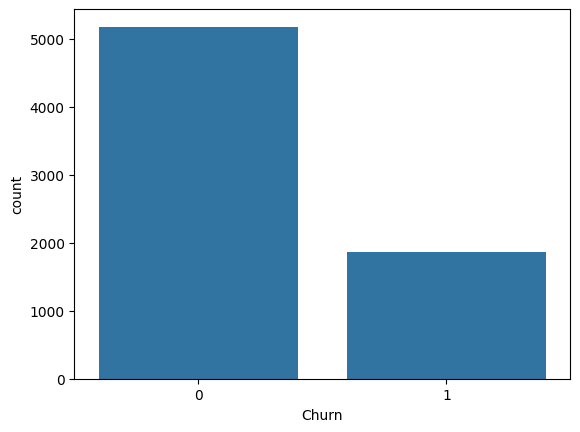

In [12]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [13]:
dados_final.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [14]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [15]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [16]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [17]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

In [18]:
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


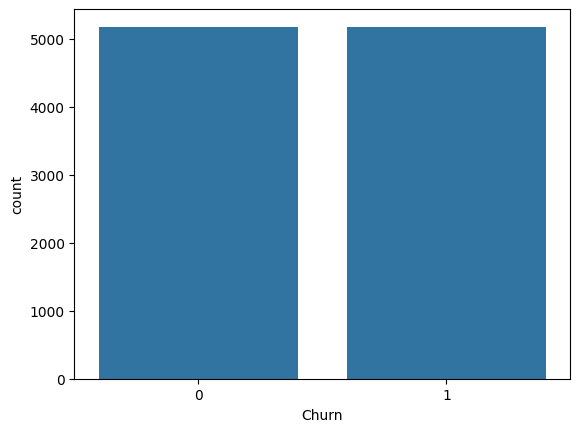

In [19]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [20]:
dados_final.Churn.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

# Aula 2 - Método baseado na proximidade

## 2.1 - Modelo K-nearest neighbors (KNN)

O KNN é um método simples que utiliza a distância entre os dados para realizar a classificação. No KNN, dado um novo dado, o algoritmo calcula a distância desse dado em relação aos demais dados do conjunto de treinamento. Com base nessa distância, o algoritmo classifica o novo dado com base nos K vizinhos mais próximos. 

No entanto, é importante escolher o valor adequado de K, pois valores muito pequenos podem levar ao overfitting e valores muito grandes podem levar ao underfitting. Também é importante escolher a métrica de distância correta, sendo a métrica Euclidiana uma opção comum.

Além disso, antes de calcular a distância, é necessário normalizar os dados para que todos estejam na mesma escala. Isso é feito utilizando a função StandardScaler do pacote de pré-processamento do Scikit-learn.

Em resumo, o KNN é um algoritmo simples e eficiente de classificação que utiliza a distância entre os dados para realizar a classificação de novos dados. A escolha do valor de K e da métrica de distância são importantes para obter a melhor classificação possível do modelo. Também é necessário normalizar os dados antes de calcular a distância para garantir que todos estejam na mesma escala.

## 2.2 - KNN por trás dos panos

In [21]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [22]:
#ymaria = ?

In [23]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [24]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [25]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ]])

In [26]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81514931, -0.41254225,
       -1.10768665, -1.32177005, -0.88499468,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.51751958, -0.95853201, -0.44617598,  1.57389661,  1.04306   ,
       -0.44617598, -0.6419641 ,  0.87997069, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20287745, -0.44617598,
       -0.79008532, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30373042, -0.47943196, -0.4360152 ])

In [27]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81514931, -0.41254225,
        -1.14935017, -0.9723572 ,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51751958, -0.95853201, -0.44617598,  1.57389661,  1.04306   ,
         2.24126814, -0.6419641 , -1.13640148,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83133988, -0.44617598,
         1.26568609, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76702973, -0.47943196,  2.293498  ]])

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [28]:
import numpy as np

In [29]:
a = Xmaria_normalizado

In [30]:
b = X_normalizado[0]

In [31]:
#1 - começamos subtraindo 
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166352,  0.34941285,  2.01494498, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03421733,  0.        ,
         2.05577141,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [32]:
#2 - depois realizamos a exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73584854e-03, 1.22089340e-01, 4.06000326e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13804017e+00, 0.00000000e+00, 4.22619609e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [33]:
#3 - a soma 
np.sum(np.square(a-b))

91.70986517145157

In [34]:
#4 - então tiramos a raiz e temos nossa distância
np.sqrt(91.70603225977928)

9.576326657950807

## 2.3 - Implementando o modelo

In [35]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [36]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### Treino e teste 

In [37]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

In [39]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [40]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [41]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

# Aula 3 - Método probabilístico

## 3.1 - Teorema de Naive Bayes 

O teorema de Naïve Bayes é um princípio estatístico que é utilizado em tarefas de aprendizado de máquina supervisionado, como a classificação. Ele se baseia no princípio da independência condicional, que afirma que cada característica utilizada por uma determinada classe contribui de forma independente para a determinação dessa classe.

O teorema de Bayes estabelece a relação entre a probabilidade condicional de um evento ocorrer, dado que outro evento já ocorreu, e a probabilidade a priori desses eventos. A fórmula do teorema de Bayes é: $P(y|x) = P(X|y) \times P(y)/P(X)$.

Na classificação, o teorema de Naïve Bayes é utilizado para calcular a probabilidade de uma determinada classe ocorrer, dado um conjunto de características. Essa probabilidade é chamada de probabilidade a posteriori. Para calcular essa probabilidade, são utilizadas três partes da fórmula do teorema de Bayes:

- Verossimilhança ($P(X|y)$): Mede a probabilidade de uma determinada característica ocorrer, dado que a classe ocorreu.
- Probabilidade a priori da classe ($P(y)$): É a probabilidade de uma determinada classe ocorrer em toda a amostra.
- Probabilidade a priori da evidência ($P(X)$): É a prevalência da característica sobre a amostra.

Multiplicando a verossimilhança pela probabilidade a priori da classe e dividindo pelo probabilidade a priori da evidência, obtemos a probabilidade a posteriori, ou seja, a probabilidade de uma determinada classe ocorrer, dado que um conjunto de características ocorreu.

O modelo Bernoulli Naïve Bayes é um exemplo de modelo que utiliza o teorema de Naïve Bayes. Ele assume que as características são independentes entre si, o que simplifica os cálculos.

## 3.2 - Modelo Bernoulli Naive Bayes

A distribuição multivariada de Bernoulli é uma extensão da distribuição de Bernoulli para o caso de múltiplas variáveis binárias. Nesse modelo, cada variável pode assumir apenas dois valores possíveis, geralmente representados como 0 e 1.

A distribuição multivariada de Bernoulli é utilizada em problemas de classificação e aprendizado de máquina supervisionado, onde é necessário modelar a ocorrência de múltiplas características binárias em relação a uma classe específica.

Para calcular essa distribuição, é necessário conhecer o parâmetro P, que representa a probabilidade de uma determinada característica ocorrer dado que a classe ocorreu. Além disso, é necessário ter o conjunto de características Xi.

A partir dessas informações, é possível calcular a verossimilhança, ou seja, a probabilidade do conjunto de características ocorrer dado que a classe ocorreu. Esse cálculo é realizado para todas as características e é utilizado para realizar a classificação.

É importante ressaltar que nem todas as características precisam ser binárias na distribuição multivariada de Bernoulli. Algumas características podem assumir mais de dois valores, como no exemplo do projeto, em que a forma de pagamento é uma característica não binária.

## 3.3 - Treinamento e teste

In [42]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [43]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
X_treino_median = np.median(X_treino)
X_treino_median

-0.4461759755508453

In [44]:
#criamos o modelo
bnb = BernoulliNB(binarize=-X_treino_median)

In [45]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ]])

In [46]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [47]:
#treinar o modelo
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=0.4461759755508453)

In [48]:
#testar o modelo
predito_BNb = bnb.predict(X_teste)

In [49]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

# Aula 4 - Método Simbólico

## 4.1 - O que é árvore de decisão?

A Árvore de Decisão é um modelo de Machine Learning utilizado para classificar ou prever um resultado com base em um conjunto de características ou atributos. Essa técnica utiliza uma estrutura de árvore, onde cada nó representa uma decisão ou um teste em um atributo, e cada ramo representa uma possível resposta ou resultado. A partir dos dados de treinamento, a árvore é construída de forma a otimizar a divisão dos dados em subconjuntos mais homogêneos em relação à variável classificadora. Dessa forma, é possível visualizar o fluxo dos dados até a variável classificadora, tornando o modelo intuitivo e fácil de entender. No entanto, é importante tomar cuidado na hora de montar e estruturar a árvore, para evitar problemas como overfitting e instabilidade do modelo.

## 4.3 - Implementando o modelo

In [50]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [51]:
#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [52]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [53]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.02054535, 0.01470657, 0.0068095 , 0.01932178, 0.01911569,
       0.16070361, 0.22571587, 0.01036784, 0.00344576, 0.00902242,
       0.0019815 , 0.03131262, 0.00065123, 0.01065514, 0.        ,
       0.01612444, 0.00481101, 0.        , 0.00994934, 0.00962653,
       0.00027769, 0.00721476, 0.01425978, 0.00368329, 0.01929482,
       0.00348337, 0.        , 0.00415289, 0.0076796 , 0.0003825 ,
       0.01040238, 0.03611651, 0.16384005, 0.07422263, 0.0176017 ,
       0.0210901 , 0.02173559, 0.01969615])

In [54]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [55]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# 5 - Validação dos modelos

## 5.1 - Matriz de confusão



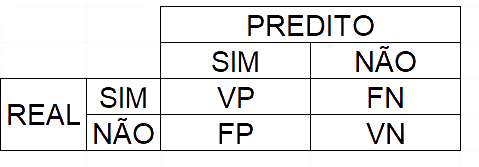

In [67]:
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go

In [71]:
def plot_confusion_matrix(confusion_matrix):
    fig = go.Figure(data=go.Heatmap(
                    z=confusion_matrix[::-1],
                    x=['SIM', 'NÃO'],
                    y=['NÃO', 'SIM'],
                    name='',
                    hovertemplate='REAL: %{y}<br>PREDITO: %{x}<br>QUANTIDADE: %{z}',
                    colorscale='Greens'))

    fig.update_layout(
        title='Confusion Matrix',
        xaxis_title='PREDITO',
        yaxis_title='REAL')

    fig.show()

In [72]:
confusion_matrix_data = confusion_matrix(y_teste, predito_knn)
plot_confusion_matrix(confusion_matrix_data)


In [74]:
confusion_matrix_data = confusion_matrix(y_teste, predito_BNb)
plot_confusion_matrix(confusion_matrix_data)

In [76]:
confusion_matrix_data = confusion_matrix(y_teste, predito_ArvoreDecisao)
plot_confusion_matrix(confusion_matrix_data)

## 5.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
#modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8144927536231884


In [79]:
#modelo Bernoulli de naive bayes
print(accuracy_score(y_teste, predito_BNb))

0.7671497584541063


In [80]:
#modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8093397745571659


## 5.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [81]:
from sklearn.metrics import precision_score

In [82]:
#modelo KNN
print(precision_score(y_teste, predito_knn))

0.7966625463535228


In [83]:
#modelo Bernoulli de naive bayes
print(precision_score(y_teste, predito_BNb))

0.727986539540101


In [84]:
#modelo árvore de decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.8006369426751593


## 5.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [85]:
from sklearn.metrics import recall_score

In [86]:
#modelo KNN
print(recall_score(y_teste, predito_knn))

0.8391927083333334


In [87]:
#modelo Bernoulli de naive bayes
print(recall_score(y_teste, predito_BNb))

0.8450520833333334


In [88]:
#modelo árvore de decisão
print(recall_score(y_teste, predito_ArvoreDecisao))

0.818359375


## 5.5 - Escolhendo o melhor modelo


In [89]:
#Exemplo - análise das precisões calculadas anteriormente
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.7966625463535228
Modelo Bernoulli de Naive Bayes:  0.727986539540101
Modelo Árvore de Decisão:  0.8006369426751593
